In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
delta1 = np.random.random(size = 7)
delta2 = np.random.random(size = 7)
delta3 = np.random.random(size = 7)

In [3]:
x_ax = np.linspace(-3, 3, 300)

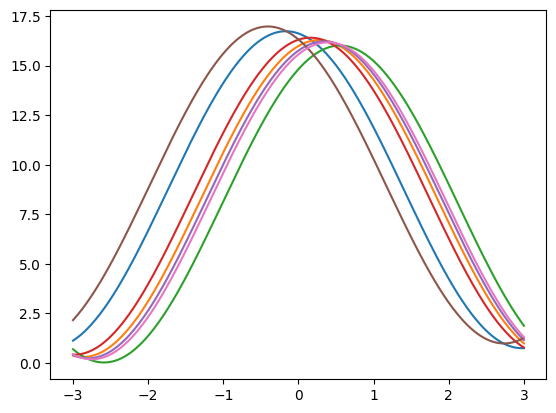

In [4]:
# Класс 1

signal1 = [(1 + np.sin((1 + x_ax + delta1[i]))) * 8 + delta1[i] for i in range(7)]
for i in signal1:
    plt.plot(x_ax,i)


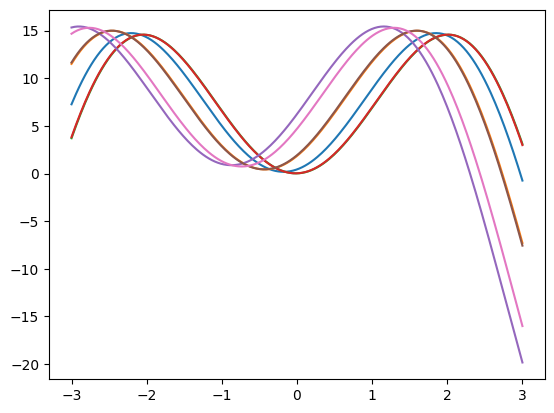

In [6]:
# Класс 2

signal2 = [8 * np.sin(x_ax + delta2[i]) * (x_ax + delta2[i]) + delta2[i] for i in range(7)]
for i in signal2:
    plt.plot(x_ax,i)


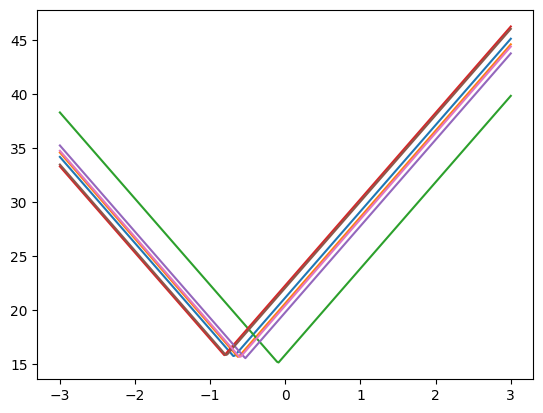

In [19]:
# Класс 3

signal3 = [(8 * (np.abs(x_ax + delta3[i]))) + delta3[i] + 15 for i in range(7)]
for i in signal3:
    plt.plot(x_ax,i)


In [21]:
def distance_matrix(x, y, q) -> np.array:
    matrixdist = np.zeros((len(y), len(x)))
    for i in range(len(y)):
        for j in range(len(x)):
            matrixdist[i, j] = np.abs((x[j] - y[i]))**q
    return matrixdist

In [22]:
def DTW(x, x_s, q=1, isDTW=True):
    '''
        x: первый ряд
        x_s : второй ряд
        q : степень для вычисления базового расстояния
    '''
    N = len(x)
    M = len(x_s)

    dist = distance_matrix(x,x_s,q=2)
    
    R = [[0] * (M + 1) for i in range(N + 1)]
   # Матрица дистанций
    for i in range(1, N): 
        R[i][0] = dist[i, 0] + R[i - 1][0] 
    for j in range(1, M):
        R[0][j] = dist[0, j] + R[0][j - 1]

    k = 0
    if isDTW:
        k = 1
    
    for i in range(1, N + 1): 
        for j in range(1, M + 1):
            R[i][j] = dist[i - 1, j - 1] + k * np.min([R[i - 1][j - 1], R[i][j - 1], R[i - 1][j]]) 
    # Ищем мин путь
    path = [] 
    i = N
    j = M
    while i >= 0 and j >= 0:
        path.append((i,j))
        if R[i][j - 1] <= R[i - 1][j - 1] and R[i][j - 1] <= R[i - 1][j]:
            I = i
            J = j - 1                
        
        if R[i - 1][j] <= R[i - 1][j - 1] and R[i - 1][j] <= R[i][j - 1]:
            I = i - 1
            J = j 

        if R[i - 1][j - 1] <= R[i][j - 1] and R[i - 1][j - 1] <= R[i - 1][j]:
            I = i - 1
            J = j - 1
        
        i = I
        j = J
    # Расстояние между 2 рядами
    s = 0
    for l in path:
        s += R[l[0]][l[1]]
    s = s / len(path) 

    return s, path, R


In [23]:
def compare_signals_DTW(signal1, signal2):
    ans = [[0] * len(signal2) for i in range(len(signal1))]
    for i in range(len(signal1)):
        for j in range(len(signal2)):
            ans[i][j] = DTW(signal1[i], signal2[j], q = 2)[0]
    return ans

In [24]:
def compare_signals_Euclid(signal1, signal2):
    ans = [[0] * len(signal2) for i in range(len(signal1))]
    for i in range(len(signal1)):
        for j in range(len(signal2)):
            ans[i][j] = np.sqrt(np.sum((signal1[i] - signal2[j])**2))
    return ans

Метрики для каждой пары функций из разных классов

In [25]:
for i in compare_signals_DTW(signal1, signal2):
    print(*i)

2733.089831490458 7041.501343540808 1923.9459573655192 1935.4756354388442 6135.120066754592 7045.4239499079395 6658.857433700733
3840.706760195729 9417.706030820793 2025.3035830598778 2065.973271338432 8026.136451046686 9420.074129583876 8733.950153166032
6973.079147063655 10649.300925709656 4415.171447630269 4472.207109479179 9123.806944031865 10645.575710082605 10213.640855742911
3526.3375306541625 8804.209542655848 1981.6327667487 2012.4969794263934 7563.050745599389 8815.541446731324 8224.845611600998
6350.312800558151 9757.792846376678 4292.533789357265 4340.672834270108 8270.299751171155 9756.10011673805 9010.692081403795
4464.560454934671 5882.300301649366 4053.701037591614 4064.753196197238 5137.439122158718 5888.2814265191955 5571.637620129311
6485.95430554513 9984.590448274841 4311.311665393149 4365.035009594392 8430.813920725346 9983.62284874755 9191.716308779394


In [26]:
for i in compare_signals_Euclid(signal1, signal2):
    print(*i)

166.93633714291312 163.83400167308932 167.27341734721168 167.28794358664493 161.12807273132458 163.66955199475464 160.19844830581795
163.48837908702677 157.57415505733877 165.94396389646954 165.8912161244815 154.2195384458395 157.31595740275426 152.58386257121794
158.85161975044042 152.19653551662728 162.3875597263067 162.29556806395357 152.1554334232679 151.9396769458785 148.7572311324541
164.8801175085207 159.52490088095556 166.8174489929295 166.78209476174305 155.63946154504708 159.28053224190504 154.44704136392656
162.52403394684447 156.34984179613767 165.26505240420585 165.20238553298668 153.54065884435695 156.0874320105853 151.56345346492515
166.66471747783828 165.77788052086763 165.72988315586707 165.7808202320759 166.24652837322424 165.70651269774646 164.63791512623493
161.7639394532337 155.4340552248532 164.70161639806966 164.63195090686938 153.12267968748606 155.1704088993057 150.86378591654815


In [27]:
for i in compare_signals_DTW(signal2, signal3):
    print(*i)

36414.26588698459 36692.074179015806 42562.95270083558 35763.04155661857 37287.65032111353 35964.97651171884 36890.114268846744
33045.77857958909 33259.42395879845 38494.43137988843 32568.999485307275 33750.586642345464 32707.766699547046 33432.37036798175
40290.90615759605 40658.89553319311 47133.620288307044 39533.020950952065 41365.77774812646 39728.368756534976 40890.81258013982
40148.098284979 40487.10795870395 46971.445984176564 39403.22172886558 41223.64961938328 39597.53877663601 40718.53194007549
31679.902521132637 31836.566462832292 36588.69198470625 31323.643821732236 32270.210994666842 31477.78028678033 31989.529962841018
32944.76876302747 33189.80107759132 38385.09022553378 32474.390614782773 33682.28681187371 32612.734747314436 33367.42921166939
31865.341836578293 32030.345745766193 36804.761518949854 31491.911882124572 32447.207387131475 31609.607586750943 32220.3497548289


In [28]:
for i in compare_signals_Euclid(signal2, signal3):
    print(*i)

368.7904670719086 364.6866477261752 339.606940607446 378.5429773126444 358.5857035122292 376.55306246629067 363.11909142787334
381.24768892576674 377.3227328757903 353.70579651661154 390.6280272358983 371.51486821492443 388.7084070230488 375.8273099857626
368.3724466171525 364.23447412756593 338.55343206450493 378.16724896852924 358.0605373196611 376.17261988806075 362.65083536177417
368.29084966622565 364.1526669533475 338.48333645962833 378.08732229081926 357.97910896394575 376.09223686962906 362.5690417306357
435.95493677169475 432.4536492649968 410.79730650725475 444.33557544362884 427.2671747559115 442.61797066262807 431.11934289077897
382.06300087175174 378.1475988814661 354.59481657279554 391.4222996709218 372.35468566096233 389.50678376691104 376.6559343769024
415.29462834650826 411.67377719641627 389.6720111797225 423.9725289076036 406.3214755710114 422.193379638323 410.2952685932665


In [29]:
for i in compare_signals_DTW(signal2, signal3):
    print(*i)

36414.26588698459 36692.074179015806 42562.95270083558 35763.04155661857 37287.65032111353 35964.97651171884 36890.114268846744
33045.77857958909 33259.42395879845 38494.43137988843 32568.999485307275 33750.586642345464 32707.766699547046 33432.37036798175
40290.90615759605 40658.89553319311 47133.620288307044 39533.020950952065 41365.77774812646 39728.368756534976 40890.81258013982
40148.098284979 40487.10795870395 46971.445984176564 39403.22172886558 41223.64961938328 39597.53877663601 40718.53194007549
31679.902521132637 31836.566462832292 36588.69198470625 31323.643821732236 32270.210994666842 31477.78028678033 31989.529962841018
32944.76876302747 33189.80107759132 38385.09022553378 32474.390614782773 33682.28681187371 32612.734747314436 33367.42921166939
31865.341836578293 32030.345745766193 36804.761518949854 31491.911882124572 32447.207387131475 31609.607586750943 32220.3497548289


In [30]:
for i in compare_signals_Euclid(signal1, signal3):
    print(*i)

402.56093242145056 399.67009502159766 380.24718810962435 409.38070670970353 395.32036230692734 407.99166398466366 398.5593451123041
399.44257561503235 397.19109243319974 384.67485032254103 404.9676592476937 393.92976572407343 403.8208001033253 396.34291838226187
396.25493451263765 394.309994088062 385.4007479899063 401.18098821827016 391.5840265297161 400.1437257159164 393.58952261816927
400.5563161445239 398.1510061175985 383.91881442886313 406.3888989367753 394.62532989295096 405.18497258914624 397.2393245158538
398.7220830261304 396.5538834976673 384.98770179284213 404.08223063072626 393.43664136469437 402.96580370067824 395.7402220216703
402.6812769874031 399.40337984313993 376.0157397730769 410.30069691804533 394.40457930144385 408.7602772702287 398.1349877151031
398.17808973006146 396.066483309624 385.1564487466256 403.4269343714707 393.0476326995877 402.33095429909486 395.27633848226697


DTW более чувствительный

In [31]:
x_train, y_train, x_test, y_test = [], [], [], []
x_train = signal1[:5]+signal2[:5]+signal3[:5]
x_test = signal1[5:]+signal2[5:]+signal3[5:]
y_train = [0] * 5 + [1] * 5 + [2] * 5
y_test = [0] * 2 + [1] * 2 + [2] * 2


In [32]:
from pyts.classification import KNeighborsClassifier
from pyts.classification import TimeSeriesForest

DTW_clf = KNeighborsClassifier(metric = "dtw")
DTW_clf.fit(x_train, y_train)

Euclid_clf = KNeighborsClassifier(metric = "minkowski", p = 2)
Euclid_clf.fit(x_train, y_train)

forest_clf = TimeSeriesForest(random_state=43)
forest_clf.fit(x_train, y_train)


TimeSeriesForest(random_state=43)

In [33]:
print(f"Accuracy DTW {DTW_clf.score(x_test, y_test)}")
print(f"Accuracy Euclid {Euclid_clf.score(x_test, y_test)}")
print(f"Accuracy Forest {forest_clf.score(x_test, y_test)}")


Accuracy DTW 1.0
Accuracy Euclid 1.0
Accuracy Forest 1.0


Все модели справились на 100%

А если взять что-то вне теста

In [35]:
b = (1+np.sin((2+x_ax)/1.5))*3.5 + np.random.normal(scale = 0.2, size = 300
                                                )

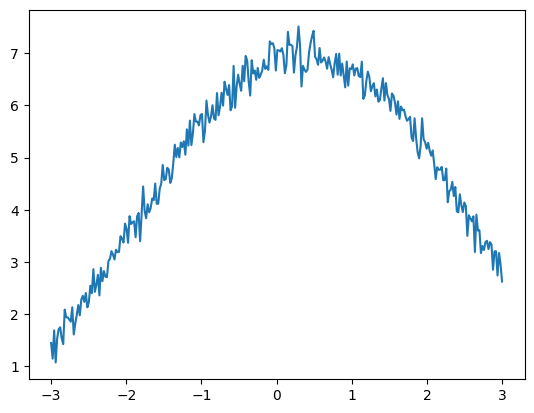

In [36]:
plt.plot(x_ax,b)

In [37]:
print(f"Вектор вероятности принадлежности к классам DTW {DTW_clf.predict_proba(b.reshape(1, -1))}")
print(f"Вектор вероятности принадлежности к классам Euclid {Euclid_clf.predict_proba(b.reshape(1, -1))}")
print(f"Вектор вероятности принадлежности к классам Forest {forest_clf.predict_proba(b.reshape(1, -1))}")

Вектор вероятности принадлежности к классам DTW [[1. 0. 0.]]
Вектор вероятности принадлежности к классам Euclid [[1. 0. 0.]]
Вектор вероятности принадлежности к классам Forest [[0.586 0.398 0.016]]


Ну, да

In [38]:
c = (1 + np.sin((1 + x_ax))) * 8 + np.random.normal(scale = 0.2, size = 300)


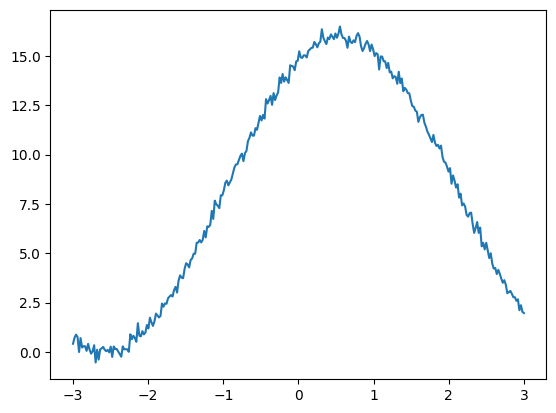

In [39]:
plt.plot(x_ax,c)

In [40]:
print(f"Вектор вероятности принадлежности к классам DTW {DTW_clf.predict_proba(c.reshape(1, -1))}")
print(f"Вектор вероятности принадлежности к классам Euclid {Euclid_clf.predict_proba(c.reshape(1, -1))}")
print(f"Вектор вероятности принадлежности к классам Forest {forest_clf.predict_proba(c.reshape(1, -1))}")

Вектор вероятности принадлежности к классам DTW [[1. 0. 0.]]
Вектор вероятности принадлежности к классам Euclid [[1. 0. 0.]]
Вектор вероятности принадлежности к классам Forest [[0.848 0.118 0.034]]


Ну, да, да